Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2581 - accuracy: 0.9261
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1141 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0772

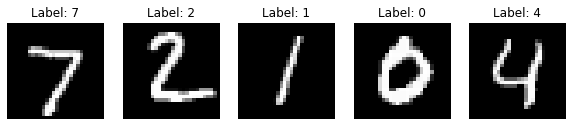

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

class MNISTClassifier:
    def __init__(self):
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        return model

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    def visualize_data(self, X_data, y_data, num_samples=5):
        fig, axes = plt.subplots(1, num_samples, figsize=(10, 4))

        for i in range(num_samples):
            axes[i].imshow(X_data[i], cmap='gray')
            axes[i].set_title(f"Label: {y_data[i]}")
            axes[i].axis('off')

        plt.show()

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create an instance of the MNISTClassifier
mnist_classifier = MNISTClassifier()

# Train the model
mnist_classifier.train(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
mnist_classifier.evaluate(X_test, y_test)

# To visualize the data
mnist_classifier.visualize_data( X_test, y_test, num_samples=5)
